<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [7]:
## Write your code here
print("Basic Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe(include='all'))  # include='all' for categorical + numeric

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

Summary Statistics:
          ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50207            23911   
mean    32719.000000                             NaN              NaN   
std     18890.179119                             NaN              NaN   
min         1.000000                             NaN              NaN   
25%     16360.000000                             NaN              NaN   
50%     32719.000000                             NaN              NaN   
75%     49078.000000                             NaN

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [8]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

print("\nMissing Values per Column:")
print(missing_counts)


Missing Values per Column:
AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



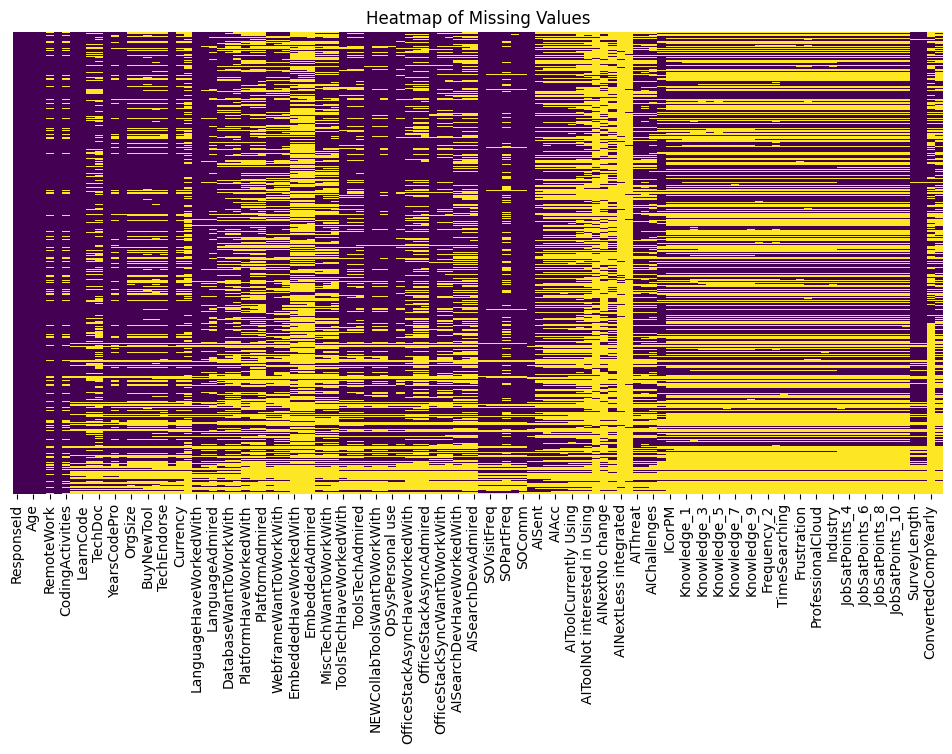

In [10]:
## Write your code here
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [20]:
## Write your code here
missing_remotework = df['RemoteWork'].isnull().sum()
print(f"\nNumber of missing rows in 'RemoteWork': {missing_remotework}")


Number of missing rows in 'RemoteWork': 10631


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [21]:
## Write your code here
remotework_mode = df['RemoteWork'].mode()[0]
print(f"\nMost frequent value in 'RemoteWork': {remotework_mode}")


Most frequent value in 'RemoteWork': Hybrid (some remote, some in-person)


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [23]:
## Write your code here
df['RemoteWork'].fillna(remotework_mode, inplace=True)

/tmp/ipykernel_3365/3337988510.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(remotework_mode, inplace=True)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_3365/4087595920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')


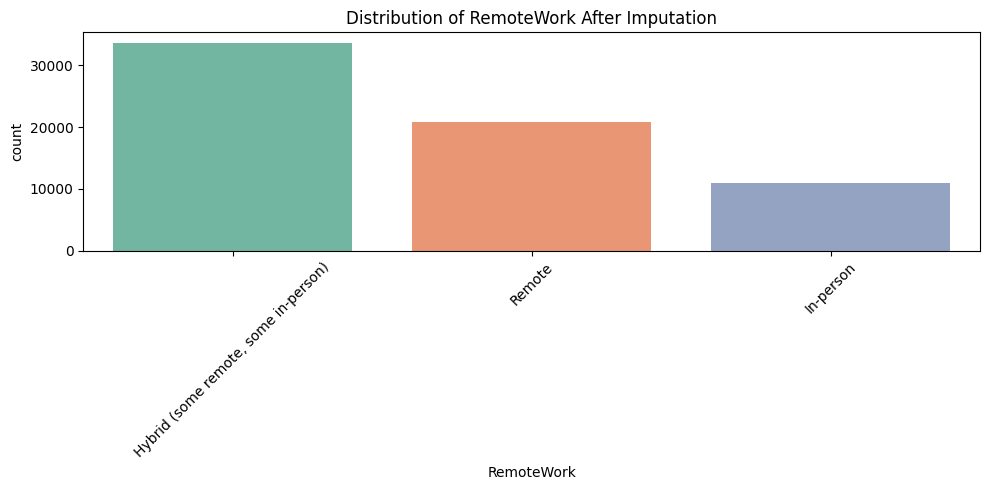

In [24]:
## Write your code here
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')
plt.title("Distribution of RemoteWork After Imputation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
